Converged at iteration 5


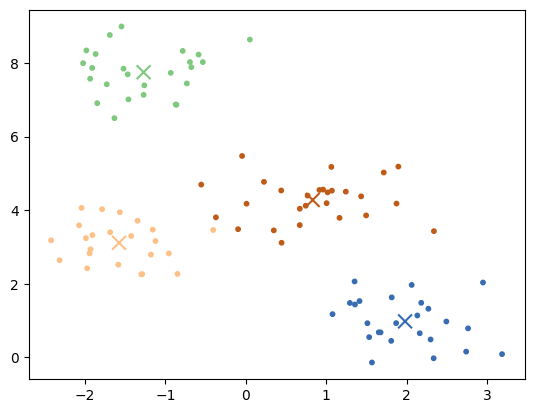

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import random

prefix_path = ''
def k_means(filename, plot=True , K=3):
    colorMap = plt.get_cmap('Accent')
    inFile = open(prefix_path + filename,'r')

    N = int(inFile.readline())
    points = np.zeros([N,2])

    for i in range(N):
        pt = inFile.readline()
        pt = pt.split()
        points[i,0] = float(pt[0])
        points[i,1] = float(pt[1])

    sc_dict = {}

    clusterColor = colorMap(np.array(range(K))/K)
    dist = np.zeros(N)
    clusterID = np.random.randint(0,K,N)
    centroids = np.array([points[random.randint(0,N-1)] for _ in range(K)])

    epsilon = 1e-4
    nrMaxIterations = 10
    for iter in range(nrMaxIterations):
        prev_centroids = centroids.copy()

        for i, pt in enumerate(points):
            min_dist = float('inf')
            for j, centroid in enumerate(centroids):
                dist = sqrt(sum((pt - centroid) ** 2))
                if dist < min_dist:
                    min_dist = dist
                    clusterID[i] = j

        for j in range(K):
            indices = np.where(clusterID == j)[0]
            if len(indices) > 0:
                centroids[j] = np.mean(points[indices], axis=0)

        centroid_movement = np.sqrt(np.sum((centroids - prev_centroids) ** 2, axis=1))
        if np.max(centroid_movement) < epsilon:
            print("Converged at iteration", iter)
            break

    if plot:
        pointColors = np.array(clusterColor[clusterID])
        plt.scatter(points[:,0], points[:,1], color = pointColors, marker = 'o', s = 10)
        centroidColors = np.array(clusterColor[range(K)])
        plt.scatter(centroids[:, 0], centroids[:, 1], color = centroidColors, marker = 'x', s = 100)
        plt.show()

def calculate_SC(points, clusterID):
    N = points.shape[0]
    sc_scores = np.zeros(N)

    for i in range(N):
        own_cluster = clusterID[i]


def main():
    filenames = ['kmpoints3.txt']

    for file in filenames:
        k_means(file, K=4)

main()